<a href="https://colab.research.google.com/github/Bikomwangi/MORINGA_IPs/blob/master/BIKO_MANDERA_MWANGI_MORINGA_SCHOOL_CORE_WK_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Figuring out how we can predict which individuals are most likely to have or use a bank account given the various demographic factors.

>



### b) Defining the Metric for Success

- The goal will have been achieved when;
1. The relationship between having a bank account and the various demographic factors is identified
2. The demographic factor wherein majority of the people possess bank accounts is identified

### c) Understanding the context 

Coverage of banking services has often been seen as an indication of financial inclusion. Given the emergence of fintechs in East Africa and the development of creative payment systems, banking institutions still play a significant role in fostering financial inclusion and economic development. Access to bank accounts allows individuals to invest and make payments easier and quicker, whilst still helping organizations develop their lines of acquiring credit.
Therefore, as a data scientist, I am tasked to formulate a model that will assist in identifying which individuals are likely to have bank accounts given various demographic factors.

### d) Recording the Experimental Design

1. Load dataset from the respective data source
2. Check for missing data and carrying out the necessary actions
3. Check for duplicates, outliers and anomalies and dealing with them approapriately.
4. Dropping the columns that will irrelavant for this particular research question.
5. Validating the dataset by comparing the dataset with external relieable resource
6. Perform univariate, bivariate and multivariate analysis recording your observations.
7. Implement the solution by performing the respective analysis 


### e) Data Relevance

The data set has a column that indicates whether a respondent has a bank or not. secondly, the dataset also contains various categories of demographic data that might be helpful in formulating the model in relation to the data analytic question.

## 2. Reading the Data

In [2]:
# Loading the Data
# Dataset url = http://bit.ly/FinancialDataset
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
%matplotlib inline
df = pd.read_csv('http://bit.ly/FinancialDataset')
# the following line of code converts floats to integers where necessary ie., household_size and Respondent Age
# pd.options.display.float_format = '{:,.0f}'.format


## 3. Checking the Data

In [3]:
# number of records in the financial dataset
#
print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns


In [4]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Checking whether each column has an appropriate datatype
#
df.dtypes


country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [7]:
# previewing random sample
df.sample(10)



,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
3090,Kenya,2018,uniqueid_3091,No,Urban,No,6.0,52.0,Female,Spouse,Married/Living together,No formal education,Farming and Fishing
14956,Tanzania,2017,uniqueid_154,No,Urban,No,2.0,27.0,Female,Spouse,Single/Never Married,Primary education,Remittance Dependent
5391,Kenya,2018,uniqueid_5392,No,Urban,Yes,3.0,29.0,Female,Spouse,Married/Living together,Primary education,Self employed
16251,Tanzania,2017,uniqueid_1449,No,Urban,Yes,3.0,43.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
9454,Rwanda,2016,uniqueid_3387,No,Rural,Yes,3.0,17.0,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
7763,Rwanda,2016,uniqueid_1696,No,Urban,Yes,2.0,45.0,Female,Head of Household,Widowed,No formal education,Formally employed Private
15109,Tanzania,2017,uniqueid_307,No,Urban,Yes,2.0,36.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
10122,Rwanda,2016,uniqueid_4055,No,Rural,No,6.0,36.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
20153,Tanzania,2017,uniqueid_5351,No,Urban,No,2.0,47.0,Male,Spouse,Single/Never Married,Primary education,Self employed
8279,Rwanda,2016,uniqueid_2212,Yes,Urban,Yes,5.0,35.0,Female,Spouse,Married/Living together,Secondary education,Self employed


In [8]:
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [9]:
df[['Respondent Age', 'Has a Bank account']].groupby(['Has a Bank account']).describe()

Respondent Age                        ...                   
                            count       mean        std  ...   50%   75%    max
Has a Bank account                                       ...                   
No                        20151.0  38.680115  16.853798  ...  35.0  49.0  100.0
Yes                        3306.0  39.601633  14.335217  ...  36.0  48.0   95.0

[2 rows x 8 columns]

In [10]:
# finance dataframe columns
sorted(df)

['Cell Phone Access',
 'Has a Bank account',
 'Level of Educuation',
 'Respondent Age',
 'The relathip with head',
 'Type of Job',
 'Type of Location',
 'country',
 'gender_of_respondent',
 'household_size',
 'marital_status',
 'uniqueid',
 'year']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [12]:
bank_acc_data = df.groupby('country').count()['Has a Bank account'].reset_index().sort_values(by='Has a Bank account',ascending=False)
bank_acc_data

,country,Has a Bank account
1,Rwanda,8735
2,Tanzania,6570
0,Kenya,6068
3,Uganda,2101


## 4. Tidying the Dataset

In [13]:
# dropping some columns so as to remain with the columns that have demographic data only
to_drop = ['uniqueid', 'The relathip with head', 'year', 'Cell Phone Access', 'household_size']
df.drop(to_drop, axis=1, inplace=True)

In [14]:
#renaming columns
df.columns = ['Country', 'Has_bankacc', 'Location_type', 'Respondent_age', 'Gender_respondent', 'Marital_status', 'Education_level', 'Job_type']

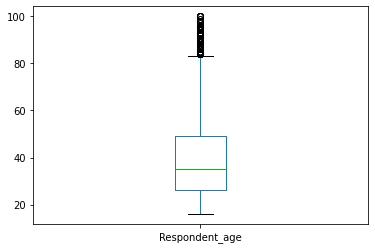

In [17]:
# detecting outliers
# 
df.boxplot(column =['Respondent_age'], grid = False) 

plt.show()

In [18]:
# checking whether there are any anomalies amongst the non-numerical data by comparing this output with the variable defination
df.nunique()


Country               4
Has_bankacc           2
Location_type         2
Respondent_age       85
Gender_respondent     2
Marital_status        5
Education_level       7
Job_type             10
dtype: int64

In [20]:
# Identifying the Missing Data
#
missing_values_count = df.isnull().sum()
missing_values_count

Country              14
Has_bankacc          36
Location_type        15
Respondent_age       34
Gender_respondent    34
Marital_status       32
Education_level      29
Job_type             30
dtype: int64

In [21]:
# dropping the columns with missing values
df1 = df.dropna()
df1

,Country,Has_bankacc,Location_type,Respondent_age,Gender_respondent,Marital_status,Education_level,Job_type
0,Kenya,Yes,Rural,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,30.0,Female,Divorced/Seperated,Secondary education,Self employed


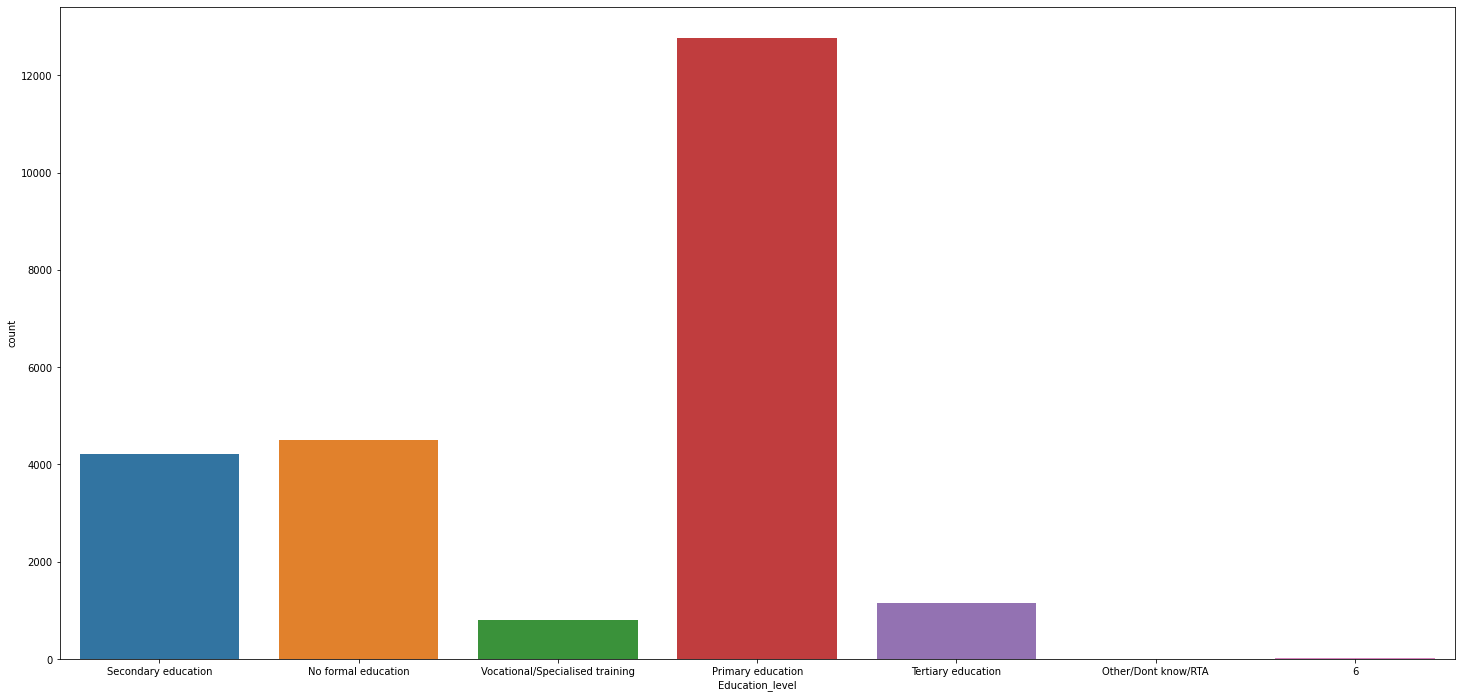

In [60]:
# detecting anomalies in the columns with objects datatype
plt.figure(figsize=(25,12))
sns.countplot(x='Education_level',data=df)

Education_level column appears to have an extra variable, '6' ,which is not defined in the VariableDefination table.

In [24]:
# eliminating '6' variable in the education level column since it is not defined in the variabledefination table
df2 = df1[(df1['Education_level'] != '6')]
df2

,Country,Has_bankacc,Location_type,Respondent_age,Gender_respondent,Marital_status,Education_level,Job_type
0,Kenya,Yes,Rural,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,30.0,Female,Divorced/Seperated,Secondary education,Self employed


## 5. EDA


1) Univariate Analysis

Text(0.5, 1.0, 'Gender distribution')

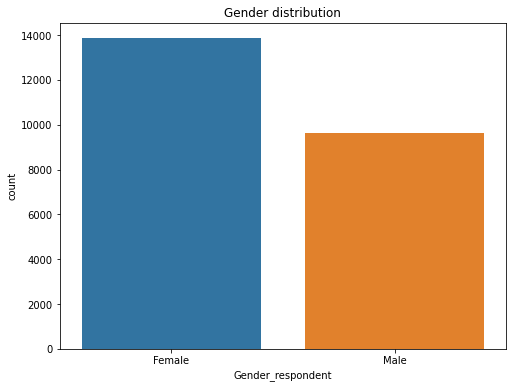

In [25]:
# Ploting the univariate summaries and recording our observations
plt.figure(figsize=(8,6))
sns.countplot(x='Gender_respondent',data=df);
plt.title("Gender distribution")


Most of the respondents were from the female gender type

Text(0.5, 1.0, 'Job type distribution')

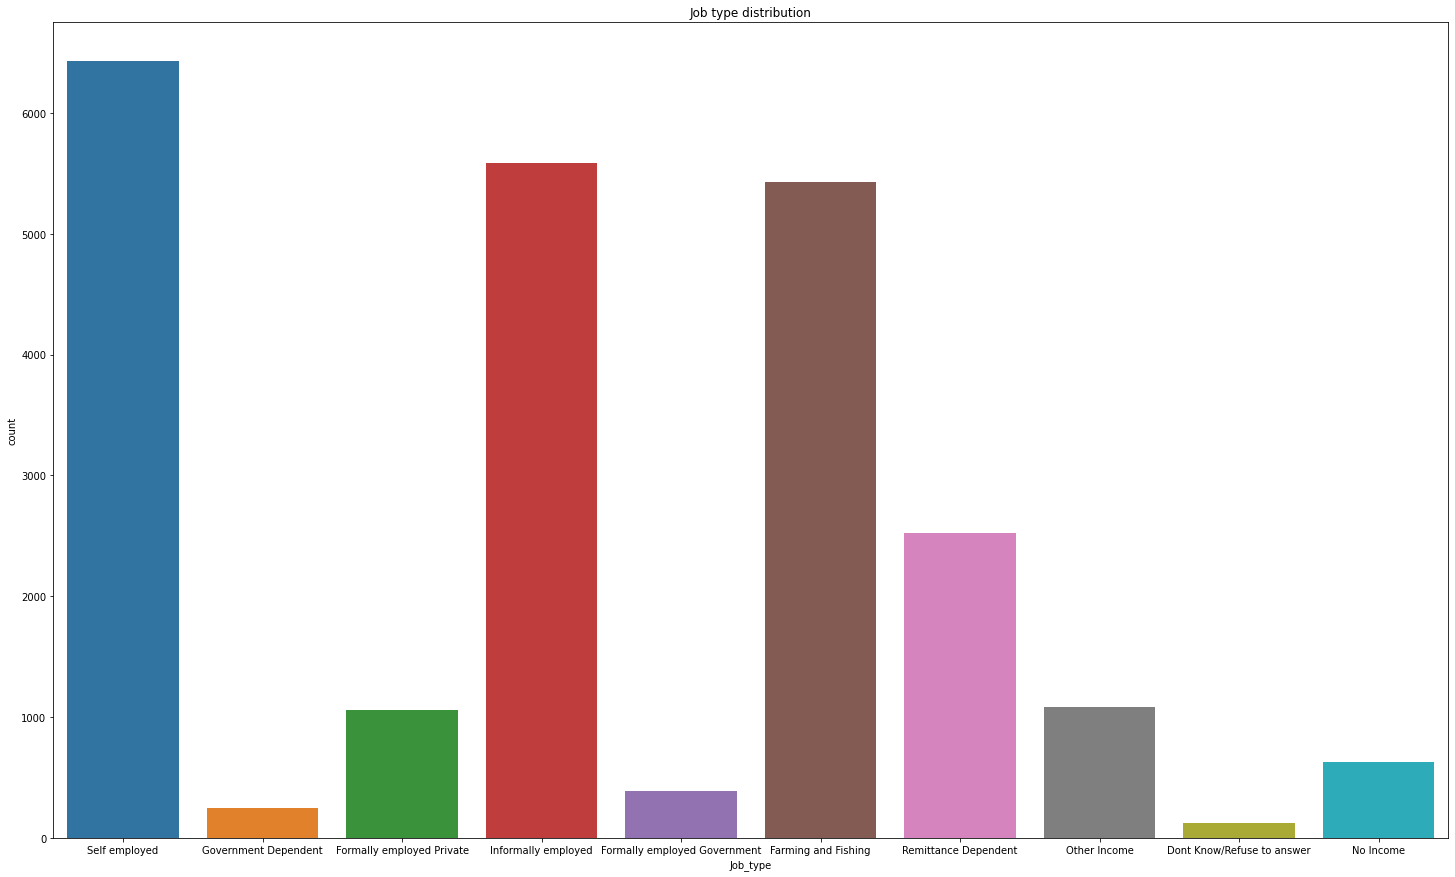

In [26]:
# job type 

plt.figure(figsize=(25,15))


sns.countplot(x='Job_type',data=df);
plt.title("Job type distribution")




Most people are self employed type of job followed by informal employment schemes

Text(0.5, 1.0, 'Marital_status')

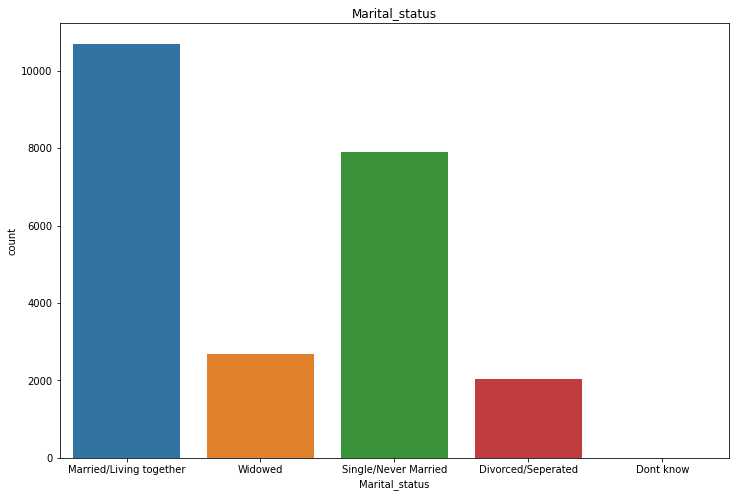

In [27]:
# distribution of various marital statuses

plt.figure(figsize=(12,8))

sns.countplot(x='Marital_status',data=df2);
plt.title("Marital_status")




Text(0.5, 1.0, 'EDUCATION LEVEL')

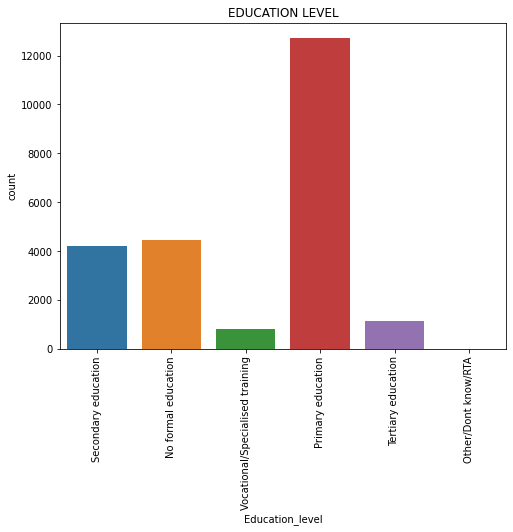

In [28]:
# education level analysis
plt.figure(figsize=(8,6))

sns.countplot(x='Education_level',data=df2);
plt.xticks(rotation = 90)
plt.title("EDUCATION LEVEL")

Most people go up to Primary education level of education

Text(0.5, 1.0, 'Having a bank account')

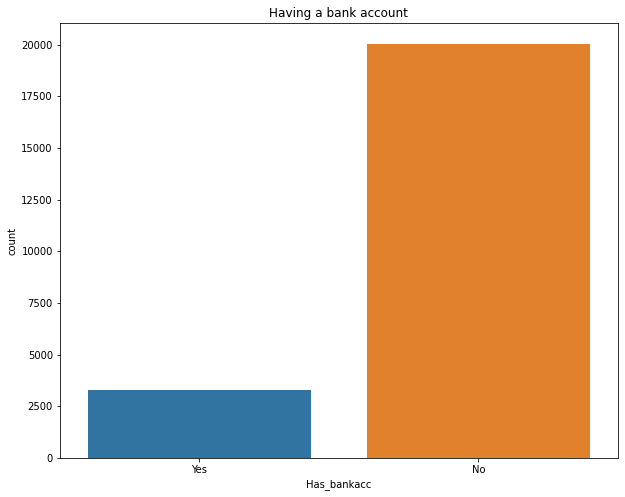

In [29]:
# bank account
plt.figure(figsize=(10,8))
sns.countplot(x='Has_bankacc',data=df2)
plt.title("Having a bank account")

The bar graph above indicates that most people do not have bank account

Text(0.5, 1.0, 'Location type')

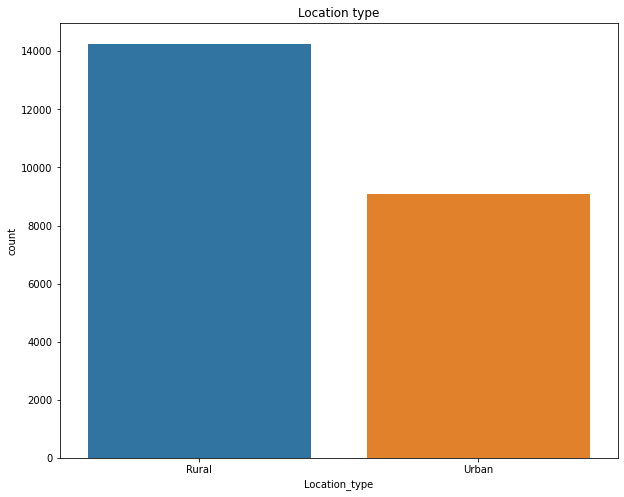

In [30]:
# location type

plt.figure(figsize=(10,8))
sns.countplot(x='Location_type',data=df2)
plt.title("Location type")

From the above bar graph we get to notice that most people live in the rural areas

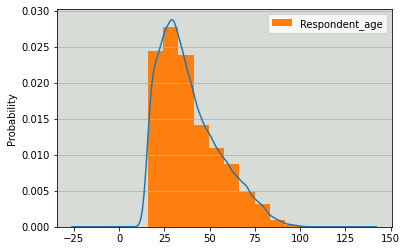

In [31]:
# frequency distribution of age

fig, ax = plt.subplots()
df2.plot.kde(ax=ax, legend=False)
df2.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

This frequency distribution curve indicates that Age column is skewed to the left which indicates most of the values lie in the lower range values


2) Bivariate Analysis




In [32]:
#two-way table showing the count of Has_bankacc in relation to the level of education
grouped = df2.groupby(['Has_bankacc','Education_level'])
grouped.size().head(60)

Has_bankacc  Education_level                
No           No formal education                 4294
             Other/Dont know/RTA                    2
             Primary education                  11619
             Secondary education                 3228
             Tertiary education                   554
             Vocational/Specialised training      345
Yes          No formal education                  176
             Other/Dont know/RTA                    6
             Primary education                   1086
             Secondary education                  981
             Tertiary education                   590
             Vocational/Specialised training      456
dtype: int64

In [33]:
# getting an insight of the relationship between the two variables
bank_edulvl_contigencytable = pd.crosstab(index=df2["Has_bankacc"], 
                          columns=df2["Education_level"])
bank_edulvl_contigencytable

Education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
Has_bankacc,,,,,,
No,4294,2,11619,3228,554,345
Yes,176,6,1086,981,590,456


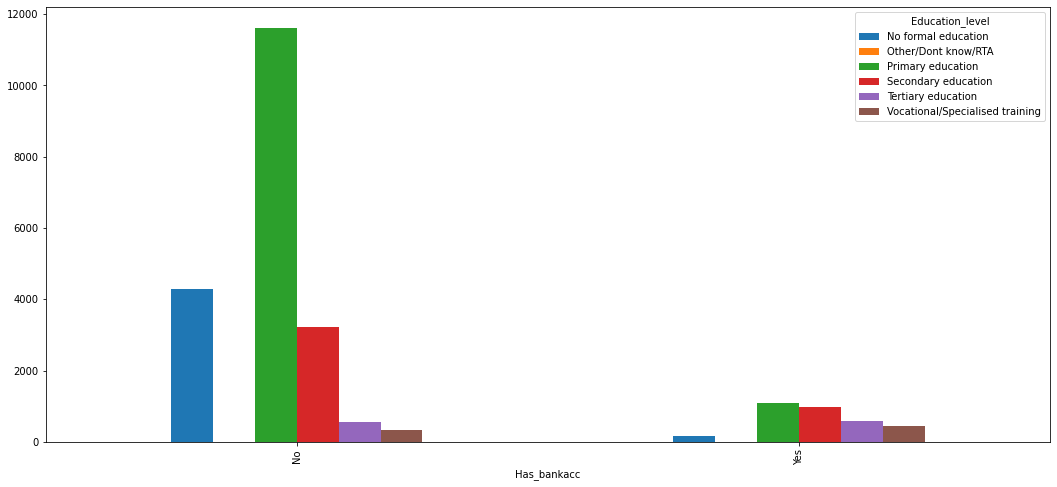

In [34]:
bank_edulvl_contigencytable.plot(kind="bar", 
                 figsize=(18,8),
                 stacked=False)
                 

Text(0.5, 1.0, 'Location type')

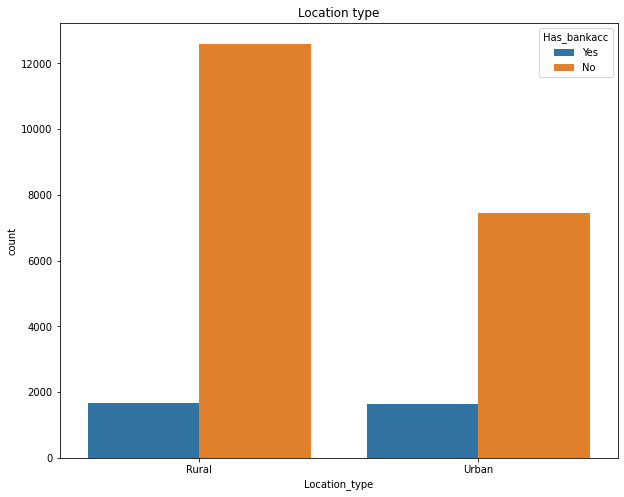

In [35]:
# finding the relationship between type of location and having a bank account
plt.figure(figsize=(10,8))
sns.countplot(x='Location_type',data=df2, hue='Has_bankacc')
plt.title("Location type")

Text(0.5, 1.0, 'Gender_respondent vs Having bankacc')

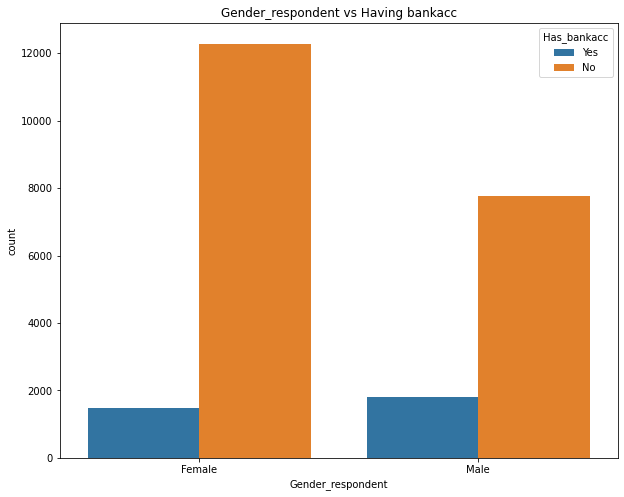

In [36]:
# gender vs having a bank account
plt.figure(figsize=(10,8))
sns.countplot(x='Gender_respondent',data=df2, hue='Has_bankacc')
plt.title('Gender_respondent vs Having bankacc')

Text(0.5, 1.0, 'Job_type vs Having bankacc')

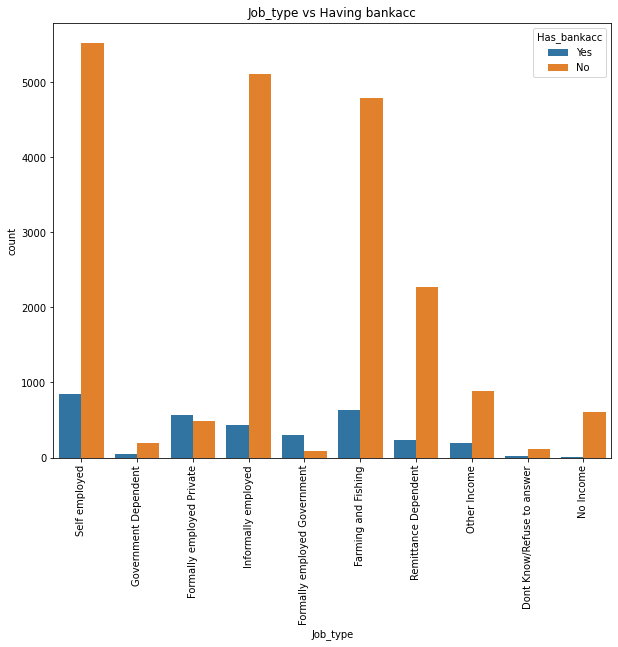

In [37]:
# job_type vs having bankacc
plt.figure(figsize=(10,8))
sns.countplot(x='Job_type',data=df2, hue='Has_bankacc')
plt.xticks(rotation = 90)
plt.title('Job_type vs Having bankacc')

In [50]:
# Calculating the correlation coeefficient
# connverting the objects with numerical values and convert them to a dummy and categorical variables respectively
df2['Gender_respondent_index']=df2.Gender_respondent.map({'Female':0,'Male':1})
df2['Location_type_index']=df2.Location_type.map({'Rural':1,'Urban':2})
df2['Has_bankacc_index']=df2.Has_bankacc.map({'Yes':1, 'No':2})
df2['Marital_status_index']=df2.Marital_status.map({'Married/Living together':1, 'Divorced/Seperated':2, 'Widowed':3, 'Single/Never Married':4, 'Don’t know':5})
df2['Education_level_index'] = df2.Education_level.map({'No formal education':1, 'Primary education':2, 'Secondary education':3, 'Vocational/Specialised training':4, 'Tertiary education':5, 'Other/Dont know/RTA':6})
df2['Jobtype_Index'] = df2.Job_type.map({'Farming and Fishing':1, 'Self employed':2, 'Formally employed Government':3, 'Formally employed Private':4, 'Informally employed':5, 'Remittance Dependent':6, 'Government Dependent':7, 'Other Income':8, 'No Income':9, 'Dont Know/Refuse to answer':10})

df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Country,Has_bankacc,Location_type,Respondent_age,Gender_respondent,Marital_status,Education_level,Job_type,Gender_respondent_index,Location_type_index,Has_bankacc_index,Marital_status_index,Education_level_index,Jobtype_Index
0,Kenya,Yes,Rural,24.0,Female,Married/Living together,Secondary education,Self employed,0,1,1,1.0,3,2
1,Kenya,No,Rural,70.0,Female,Widowed,No formal education,Government Dependent,0,1,2,3.0,1,7
2,Kenya,Yes,Urban,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed,1,2,1,4.0,4,2
3,Kenya,No,Rural,34.0,Female,Married/Living together,Primary education,Formally employed Private,0,1,2,1.0,2,4
4,Kenya,No,Urban,26.0,Male,Single/Never Married,Primary education,Informally employed,1,2,2,4.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,48.0,Female,Divorced/Seperated,No formal education,Other Income,0,1,2,2.0,1,8
23520,Uganda,No,Rural,27.0,Female,Single/Never Married,Secondary education,Other Income,0,1,2,4.0,3,8
23521,Uganda,No,Rural,27.0,Female,Widowed,Primary education,Other Income,0,1,2,3.0,2,8
23522,Uganda,No,Urban,30.0,Female,Divorced/Seperated,Secondary education,Self employed,0,2,2,2.0,3,2


In [51]:
df2.describe()

,Respondent_age,Gender_respondent_index,Location_type_index,Has_bankacc_index,Marital_status_index,Education_level_index,Jobtype_Index
count,23337.000000,23337.000000,23337.000000,23337.000000,23329.000000,23337.000000,23337.000000
mean,38.789690,0.410336,1.388996,1.858808,2.334391,2.205896,3.574024
std,16.512991,0.491905,0.487533,0.348227,1.348175,0.955777,2.317863
min,16.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,35.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,49.000000,1.000000,2.000000,2.000000,4.000000,3.000000,5.000000
max,100.000000,1.000000,2.000000,2.000000,4.000000,6.000000,10.000000


In [52]:
df2.corr()


,Respondent_age,Gender_respondent_index,Location_type_index,Has_bankacc_index,Marital_status_index,Education_level_index,Jobtype_Index
Respondent_age,1.000000,0.013215,-0.047915,-0.019264,-0.119953,-0.308066,-0.120785
Gender_respondent_index,0.013215,1.000000,0.013218,-0.116564,-0.011945,0.108129,-0.071442
Location_type_index,-0.047915,0.013218,1.000000,-0.088409,0.263498,0.134438,0.090139
Has_bankacc_index,-0.019264,-0.116564,-0.088409,1.000000,0.073069,-0.364700,0.026408
Marital_status_index,-0.119953,-0.011945,0.263498,0.073069,1.000000,0.077612,0.095819
Education_level_index,-0.308066,0.108129,0.134438,-0.364700,0.077612,1.000000,0.078607
Jobtype_Index,-0.120785,-0.071442,0.090139,0.026408,0.095819,0.078607,1.000000


In [53]:
# conducting chisquare test to evaluate the relatioship between bank account and education level
!pip install -q researchpy
import researchpy as rp
from scipy import stats

table, results = rp.crosstab(df2['Has_bankacc_index'], df['Education_level'], prop= 'col', test= 'chi-square')
    
table

Education_level  ...        
Education_level   No formal education  ...     All
Has_bankacc_index                      ...        
1                                3.94  ...   14.12
2                               96.06  ...   85.88
All                            100.00  ...  100.00

[3 rows x 7 columns]

In [54]:
results

,Chi-square test,results
0,Pearson Chi-square ( 5.0) =,3559.0012
1,p-value =,0.0000
2,Cramer's V =,0.3905


Chi-square says that there is no significant relationship between variables. Cramer's V is a post-test to give this additional information.
Cramer's V varies between 0 and 1. Close to 0 it shows little association between variables. Close to 1, it indicates a strong association.
our Cramer's V value is far from one indicating a weak relationship

In [57]:
# chisquare test of independence using researchpy to obtain the relationship between bank account and location type
table, results = rp.crosstab(df2['Has_bankacc_index'], df2['Location_type_index'], prop= 'col', test= 'chi-square')
    
table

Location_type_index                
Location_type_index                   1       2     All
Has_bankacc_index                                      
1                                 11.66   17.98   14.12
2                                 88.34   82.02   85.88
All                              100.00  100.00  100.00

In [58]:
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,182.4046
1,p-value =,0.0000
2,Cramer's phi =,0.0884


Chi square test has proven that there is a very weak relationship between bank acc and location type

## 7. Implementing the Solution

In [59]:
# Implementing the Solution
df2.corr()

,Respondent_age,Gender_respondent_index,Location_type_index,Has_bankacc_index,Marital_status_index,Education_level_index,Jobtype_Index
Respondent_age,1.000000,0.013215,-0.047915,-0.019264,-0.119953,-0.308066,-0.120785
Gender_respondent_index,0.013215,1.000000,0.013218,-0.116564,-0.011945,0.108129,-0.071442
Location_type_index,-0.047915,0.013218,1.000000,-0.088409,0.263498,0.134438,0.090139
Has_bankacc_index,-0.019264,-0.116564,-0.088409,1.000000,0.073069,-0.364700,0.026408
Marital_status_index,-0.119953,-0.011945,0.263498,0.073069,1.000000,0.077612,0.095819
Education_level_index,-0.308066,0.108129,0.134438,-0.364700,0.077612,1.000000,0.078607
Jobtype_Index,-0.120785,-0.071442,0.090139,0.026408,0.095819,0.078607,1.000000


The research problem was prompting us to come up with a solution about how we can predict whether someone has a bank account or not. In order to get to that solution one had to find out the demographic factors have a strong relationship with bank account column. After the EDA, I discovered that all the demographic had a very weak relationship with 'has bankacc' column therefore making it impossible to make that particular prediction using these demographic factors.

## 8. Challenging the solution

In [ ]:
# Reviewing the Solution 
#

The solution indicates that it is impossible to make a prediction with the given demographic factors.
- The majority of the East African population uses mobile money transfer methods to conduct transactions, and this might be the leading factor of low number of people with bank account. This means that we should also include mobile money transfer to determine the level of financial inclusion 


## 9. Follow up questions

### a). Did we have the right data?

We did not have the right data. This is because the demographic factors are weakly correlated to having a bank account thereby making it impossible to find a solution to our research problem.

### b). Do we need other data to answer our question?

I believe that we do need another set of data now that we have identified that it is impossible to solve our problem using the given dataset

### c). Did we have the right question?

I believe that we had the wrong question for this particular data set. It would have been appropriate to use it to analyse the labour markets and employment patterns as they are a huge problem in East Africa.